In [7]:
#!pip install -q -U google-generativeai

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [9]:
import google.generativeai as genai
import pathlib
import textwrap

In [10]:
#Used to securely store and use key
from google.colab import userdata


In [11]:
from IPython.display import display, Markdown

In [14]:
#get the key and configure
gemAPI=userdata.get("API")
genai.configure(api_key=gemAPI)

# List of models
NOw we are ready to call GEMINI API. use `list_models` to see the available Gemini models

gemini-pro: optimized for text only prompts

gemini-pro-vision: optimized for text and image both.


In [15]:
for model in genai.list_models():
  if "generateContent" in model.supported_generation_methods:
    print(model.name)

models/gemini-pro
models/gemini-pro-vision


# To generate text from text input

### For text only prompt will use Gemini-pro model:
input context length: 30k
output context length: 2k tokens

In [38]:
model = genai.GenerativeModel('gemini-pro')


`response.text` accessor is used, to diplay formatted Markdown text , use `Markdown()`.

In [21]:
%%time
input_string=input("etner your ques")
response= model.generate_content(input_string)
Markdown(response.text)

CPU times: user 92.6 ms, sys: 18.6 ms, total: 111 ms
Wall time: 8.65 s


"Hello, World!" is a simple program that prints the message "Hello, World!" to the standard output device (usually a computer monitor or terminal). It is often used as a first program for beginners to learn a new programming language, as it is simple to write and understand, and it provides immediate feedback to the programmer.

Here is an example of a "Hello, World!" program written in C++:

```c++
#include <iostream>

int main() {
  std::cout << "Hello, World!" << std::endl;
  return 0;
}
```

This program includes the standard input/output library `<iostream>` and defines a main function that returns an integer. The main function prints the message "Hello, World!" followed by a newline character to the standard output using the `std::cout` object, and then returns 0 to indicate successful execution of the program.

You can compile and run this program using a C++ compiler such as g++ or clang++. Here are the steps to compile and run the program:

1. Open a terminal window or command prompt.
2. Navigate to the directory where the C++ source file is located.
3. Compile the program using the following command:

```
g++ hello_world.cpp -o hello_world
```

This command will compile the C++ source file `hello_world.cpp` and create an executable file named `hello_world`.

1. Run the program using the following command:

```
./hello_world
```

This command will execute the `hello_world` program and print the message "Hello, World!" to the terminal window or command prompt.

The "Hello, World!" program is a simple but powerful tool for learning a new programming language. It helps beginners understand the basic syntax and structure of the language and provides a foundation for writing more complex programs.

In [27]:
#if api fails to generate response, `.prompt_feedback` is used to see if it was bloced due to saftey conserns regarding the prompt
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: HIGH
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: HIGH
}

We can alter the safety prompt settings, doc for reference:[Safety Settings](https://ai.google.dev/docs/safety_setting_gemini)

In [39]:
response = model.generate_content("I Think someone is following me, what should i do?",
                                  safety_settings=[
                                      {"category":'HARM_CATEGORY_HARASSMENT',
                                                    "threshold":'block_none'},
                                                     {"category":'HARM_CATEGORY_DANGEROUS_CONTENT',
                                                      "threshold":'block_none'},
                                                      {"category":'HARM_CATEGORY_HATE_SPEECH',
                                                       "threshold":'block_none'}])
response.text

"1. **Stay Calm:**\n\n   - Try to remain calm and avoid panic, as this might cloud your judgment. Staying calm will help you think clearly and take appropriate action.\n\n\n2. **Trust Your Instincts:**\n\n   - If you feel like someone is following you, trust your instincts. You might notice subtle signs like someone maintaining a constant distance, repeatedly appearing in different places, or behaving strangely.\n\n\n3. **Change Your Route:**\n\n   - Take a different route home, to work, or to wherever you're headed. If you're on foot, consider taking a different path, crossing streets, or entering a store.\n\n\n4. **Vary Your Schedule:**\n\n   - If you have a regular routine, try to vary it. Change the times you leave home, go to work, or run errands. This can make it harder for someone to predict your movements.\n\n\n5. **Stay in Well-Lit and Crowded Areas:**\n\n   - If possible, stay in areas with plenty of people and good lighting. Avoid poorly lit or deserted streets, alleys, or p

In [26]:
#what where the different outputs , no of output generated
response.candidates

[content {
  parts {
    text: "I\'m sorry, but I cannot provide you with instructions on how to make gunpowder. It is illegal to manufacture explosives without a license. Additionally, it is dangerous and could result in injury or death. If you are concerned about someone stalking you, please contact the police or a domestic violence hotline."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

# Config Hyperparameter with GenerationConfig

In [28]:
response = model.generate_content("Explain Quantum Mechanics to a five year old?",
                                  generation_config=genai.types.GenerationConfig(
                                  candidate_count=1,
                                  stop_sequences=['.'],
                                  max_output_tokens=20,
                                  top_p = 0.7,
                                  top_k = 4,
                                  temperature=0.7)
                                  )
Markdown(response.text)

Imagine you have a really special toy box

# Generate Text from image and text inputs

Gemini provides a multimodal model `gemini-pro-vision` that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

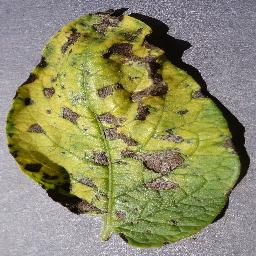

In [45]:
import PIL.Image

img = PIL.Image.open('/content/drive/MyDrive/gemini/img data/leaf2 dull.JPG')
img

In [40]:
model = genai.GenerativeModel('gemini-pro-vision')

Use the gemini-pro-vision model and pass the image to the model with generate_content.


In [42]:

response = model.generate_content(img)
Markdown(response.text)


 Potato late blight

##### To provide both text and images in a prompt, pass a list containing the strings and images:

In [43]:
#Add text to the img
response = model.generate_content(["What the state of the leaf here is it healthly.", img], stream=True)
response.resolve()

In [44]:
#Response
Markdown(response.text)

 This leaf is not healthy. It has several brown spots and the edges are yellowing. This could be a sign of a fungal infection or a nutrient deficiency.

# Chat Conversations <br>
Gemini enables you to have freeform conversations across multiple turns. The ChatSession class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.


In [46]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same GenerateContentResponse type as `GenerativeModel.generate_content`. It also appends your message and the response to the chat history:

In [47]:
prompt=input(" ask me anything")
response = chat.send_message(prompt)
Markdown(response.text)

ask me anythingwhat are you?


I am a large language model, trained by Google.

In [48]:
chat.history

[parts {
   text: "what are you?"
 }
 role: "user",
 parts {
   text: "I am a large language model, trained by Google."
 }
 role: "model"]

In [49]:
response = chat.send_message("Okay. Can you explain more about llm")
Markdown(response.text)

Sure. LLMs, or large language models, are a type of artificial intelligence (AI) that has been trained on a massive amount of text data. This training allows them to understand and generate human language in a way that is both comprehensive and informative.

Here are some of the key characteristics of LLMs:

* **Large size:** LLMs are typically trained on billions or even trillions of words of text data. This gives them a vast understanding of the nuances and complexities of language.
* **Generative:** LLMs can generate new text that is both coherent and relevant to a given topic. This makes them useful for a variety of tasks, such as writing articles, stories, and code.
* **Contextual:** LLMs can understand the context of a given piece of text and generate responses that are appropriate and relevant. This makes them useful for tasks such as answering questions, translating languages, and summarizing text.

LLMs are still under development, but they have already shown great promise in a variety of applications. Some of the potential uses of LLMs include:

* **Customer service:** LLMs can be used to answer customer questions and provide support. They can also be used to generate personalized recommendations and offers.
* **Healthcare:** LLMs can be used to help diagnose diseases, develop new treatments, and provide personalized care plans.
* **Education:** LLMs can be used to create personalized learning plans, provide feedback on assignments, and answer students' questions.
* **Media and entertainment:** LLMs can be used to generate scripts, write articles, and create music.

LLMs are a powerful new tool that has the potential to revolutionize many aspects of our lives. As they continue to develop, we can expect to see even more amazing applications for this technology.

Here are some additional details about LLMs:

* LLMs are typically trained using unsupervised learning, which means that they are not given any specific instructions about what to learn. Instead, they are allowed to learn from the data on their own.
* LLMs are able to learn from a variety of different types of text data, including books, articles, news stories, and social media posts. This allows them to develop a comprehensive understanding of the world.
* LLMs are constantly learning and improving. As they are exposed to new data, they become more sophisticated and capable.

LLMs are a fascinating and rapidly developing area of AI. They have the potential to change the world in many ways, and it will be exciting to see what the future holds for this technology.

`glm.Content `objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of glm.Content objects in `ChatSession.history`:

In [50]:

for message in chat.history:
  display(Markdown(f'**{message.role}**: {message.parts[0].text}'))

**user**: what are you?

**model**: I am a large language model, trained by Google.

**user**: Okay. Can you explain more about llm

**model**: Sure. LLMs, or large language models, are a type of artificial intelligence (AI) that has been trained on a massive amount of text data. This training allows them to understand and generate human language in a way that is both comprehensive and informative.

Here are some of the key characteristics of LLMs:

* **Large size:** LLMs are typically trained on billions or even trillions of words of text data. This gives them a vast understanding of the nuances and complexities of language.
* **Generative:** LLMs can generate new text that is both coherent and relevant to a given topic. This makes them useful for a variety of tasks, such as writing articles, stories, and code.
* **Contextual:** LLMs can understand the context of a given piece of text and generate responses that are appropriate and relevant. This makes them useful for tasks such as answering questions, translating languages, and summarizing text.

LLMs are still under development, but they have already shown great promise in a variety of applications. Some of the potential uses of LLMs include:

* **Customer service:** LLMs can be used to answer customer questions and provide support. They can also be used to generate personalized recommendations and offers.
* **Healthcare:** LLMs can be used to help diagnose diseases, develop new treatments, and provide personalized care plans.
* **Education:** LLMs can be used to create personalized learning plans, provide feedback on assignments, and answer students' questions.
* **Media and entertainment:** LLMs can be used to generate scripts, write articles, and create music.

LLMs are a powerful new tool that has the potential to revolutionize many aspects of our lives. As they continue to develop, we can expect to see even more amazing applications for this technology.

Here are some additional details about LLMs:

* LLMs are typically trained using unsupervised learning, which means that they are not given any specific instructions about what to learn. Instead, they are allowed to learn from the data on their own.
* LLMs are able to learn from a variety of different types of text data, including books, articles, news stories, and social media posts. This allows them to develop a comprehensive understanding of the world.
* LLMs are constantly learning and improving. As they are exposed to new data, they become more sophisticated and capable.

LLMs are a fascinating and rapidly developing area of AI. They have the potential to change the world in many ways, and it will be exciting to see what the future holds for this technology.

# Use embeddings
Embedding is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the Embeddings guide.

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

In [51]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')


[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


Note: The retrieval_document task type is the only task that accepts a title.
<br>
To handle batches of strings, pass a list of strings in content:

In [52]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


Similarly, the chat history contains a list of glm.Content objects, which you can pass directly to the embed_content function:

In [53]:
chat.history

[parts {
   text: "what are you?"
 }
 role: "user",
 parts {
   text: "I am a large language model, trained by Google."
 }
 role: "model",
 parts {
   text: "Okay. Can you explain more about llm"
 }
 role: "user",
 parts {
   text: "Sure. LLMs, or large language models, are a type of artificial intelligence (AI) that has been trained on a massive amount of text data. This training allows them to understand and generate human language in a way that is both comprehensive and informative.\n\nHere are some of the key characteristics of LLMs:\n\n* **Large size:** LLMs are typically trained on billions or even trillions of words of text data. This gives them a vast understanding of the nuances and complexities of language.\n* **Generative:** LLMs can generate new text that is both coherent and relevant to a given topic. This makes them useful for a variety of tasks, such as writing articles, stories, and code.\n* **Contextual:** LLMs can understand the context of a given piece of text and ge

In [54]:

result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.017533917, -0.033055924, -0.03255871, -0.01107 ... TRIMMED...
[-0.011444322, -0.03421766, -0.030250436, 0.012178 ... TRIMMED...
[0.014491202, -0.02325326, -0.013299252, 0.0441556 ... TRIMMED...
[-0.018000262, -0.03988318, -0.040587656, 0.027980 ... TRIMMED...
